In [1]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False


In [2]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
results = [1]*35+[0]*14

In [13]:
data =[length,weight,results]
df = pd.DataFrame(data)
df = df.T
df

,0,1,2
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0
5,29.7,450.0,1.0
6,29.7,500.0,1.0
7,30.0,390.0,1.0
8,30.0,450.0,1.0
9,30.7,500.0,1.0


In [17]:
datas = df.iloc[:,0:2]
datas
results = df.iloc[:,2]
results

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
Name: 2, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(datas,results,stratify=results)
# random_state=100  >  훈련세트, 테스트세트가 할 때마다 섞이지 않도록 해줌.
# stratify : 설정데이터를 가지고 랜덤으로 데이터를 섞어줌.
train_input

,0,1
5,29.7,450.0
29,37.0,1000.0
33,41.0,975.0
26,35.0,720.0
40,11.3,8.7
43,12.0,9.8
8,30.0,450.0
23,35.0,680.0
22,34.5,620.0
4,29.0,430.0


In [63]:
# 1. 데이터 전처리, NaN, 0, 타입, 표준화작업
# 2. 데이터 학습시키기
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)
# 3. 데이터 예측
clf.predict(test_input)
# 4. 정확도 측정
clf.score(test_input,test_target)

1.0

In [66]:
clf.predict([[30,590]])

array([1.])

In [67]:
clf.predict([[25,150]])

array([0.])

In [85]:
# 25,150 데이터는 knn 판별할 때 이웃하는 데이터는 indexes
distances,indexes = clf.kneighbors([[25,150]])
indexes

array([[29, 35, 28, 32, 17]], dtype=int64)

In [106]:
# pandas로 평균, 표준편차
train_input.mean()
train_input.std()

0     10.559992
1    339.351471
dtype: float64

In [108]:
# 표준점수 : (훈련데이터 - 평균) / 표준편차
type(train_input)

# numpy로 평균, 표준편차
mean = np.mean(train_input,axis=0)
std = np.std(train_input,axis=0)
mean2 = np.mean(test_input,axis=0)
std2 = np.std(test_input,axis=0)
std
# mean

0     10.412292
1    334.605062
dtype: float64

In [110]:
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean2) / std2
train_scaled

,0,1
5,0.187279,-0.086869
29,0.888373,1.556860
33,1.272534,1.482145
26,0.696292,0.720053
40,-1.579863,-1.405737
43,-1.512635,-1.402449
8,0.216091,-0.086869
23,0.696292,0.600509
22,0.648272,0.421193
4,0.120050,-0.146641


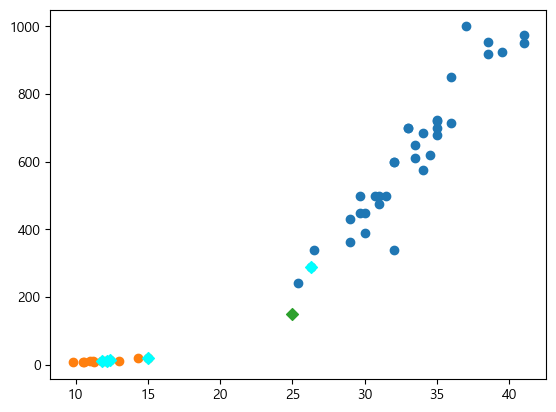

In [112]:
# plt.scatter(train_input[0],train_input[1])
# plt.scatter(test_input[0],test_input[1])

plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(25,150,marker='D')
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1],marker='D',color='aqua')
# plt.xlim(0,1000)

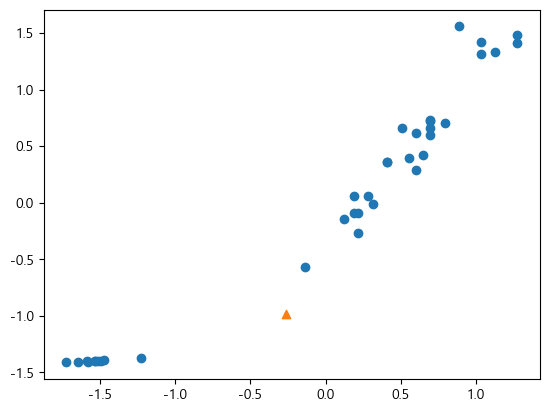

In [114]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])

new = ([25,150]-mean)/std

plt.scatter(new[0],new[1],marker='^')

In [126]:
clf.fit(train_scaled,train_target)
clf.predict([new]) 

array([1.])

In [119]:
test_scaled = (test_input-mean)/std

In [120]:
clf.score(test_scaled,test_target)

1.0

In [128]:
# knn 예측에 사용한 데이터
distance, indexes = clf.kneighbors([new])
indexes

array([[32, 31,  9,  0,  6]], dtype=int64)

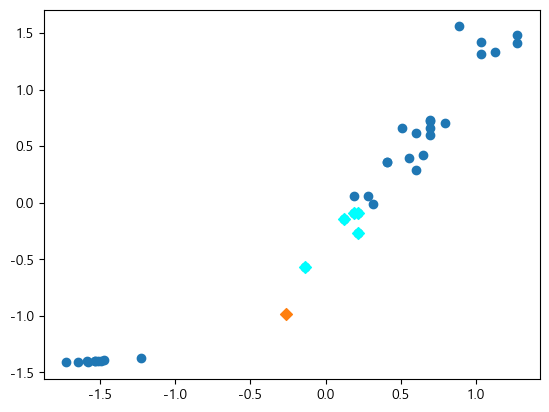

In [130]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(new[0],new[1],marker='D')
plt.scatter(train_scaled.iloc[indexes[0],0],train_scaled.iloc[indexes[0],1],marker='D',color='aqua')
# plt.xlim(0,1000)